In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import glob
from datetime import datetime as dt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option("display.max_colwidth",999)
pd.set_option("display.max_rows",999)
pd.set_option("display.max_columns",999)

## for all csv's in the SF folder, concatenate into one dataframe

In [3]:
files = glob.glob('SF/*.gz')

In [5]:
df_sf = pd.concat([pd.read_csv(fp, parse_dates = ['calendar_last_scraped','last_scraped', 'first_review', 'last_review']) for fp in files], ignore_index=True)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [57]:
# files = glob.glob('Amsterdam/*.csv.gz')
# df_amsterdam = pd.concat([pd.read_csv(fp) for fp in files], ignore_index=True)

/Users/ivankho1993/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/Users/ivankho1993/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [126]:
len(df_sf)

204559

In [6]:
152/len(df_sf)

0.0007430619039005862

In [127]:
_-152

204407

In [7]:
df_sf['year'] = df_sf.calendar_last_scraped.apply(lambda x: x.year)
df_sf_2017 = df_sf[df_sf['year']==2017]

In [11]:
len(df_sf_2017)

117566

In [128]:
df_sf.describe().T

,count,mean,std,min,25%,50%,75%,max
accommodates,204559.0,3.196931e+00,2.052881e+00,0.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.800000e+01
availability_30,204557.0,8.501728e+00,1.042011e+01,0.000000e+00,0.000000e+00,3.000000e+00,1.500000e+01,3.000000e+01
availability_365,204557.0,1.398007e+02,1.409304e+02,0.000000e+00,0.000000e+00,8.400000e+01,2.970000e+02,3.650000e+02
availability_60,204557.0,1.979917e+01,2.157171e+01,0.000000e+00,0.000000e+00,1.100000e+01,3.800000e+01,6.000000e+01
availability_90,204557.0,3.285313e+01,3.331461e+01,0.000000e+00,0.000000e+00,2.200000e+01,6.300000e+01,9.000000e+01
bathrooms,203576.0,1.283572e+00,6.764836e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.500000e+00,1.500000e+01
bedrooms,204394.0,1.347231e+00,9.283751e-01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.500000e+01
beds,204255.0,1.740643e+00,1.255789e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.600000e+01
calculated_host_listings_count,204559.0,2.695051e+00,6.132918e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,6.900000e+01
guests_included,204559.0,1.595305e+00,1.264283e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+01


In [4]:
df_sf['scrape_id'].value_counts()


20161203092353    9066
20170801223555    9057
20170101020834    9035
20171002002039    8933
20171101012846    8929
20161101212649    8864
20170702012606    8855
20170601201547    8799
20170202135808    8777
20170502132049    8770
20170301234434    8720
20170401232214    8706
20160902105952    8665
20160802153819    8610
20170901230258    8529
20160601230111    8440
20160201235901    8299
20160501213439    8086
20160402231627    8012
20151201234523    7165
20171201192557    6940
20171108032132    6866
20171206191227    6650
20150901205249    6361
20150504112114    5425
Name: scrape_id, dtype: int64

In [155]:
df_sf['reviews_per_month'].isnull()

44535

In [103]:
df_sf['reviews_per_month'].mean()

1.7486845723141347

In [107]:
df_sf['number_of_reviews'].mean()

24.817685851025864

In [6]:
# a = df_sf[df_sf['reviews_per_month'].isnull()]['number_of_reviews'].value_counts()
weird_data = df_sf[(df_sf['number_of_reviews']> 0)& (df_sf['reviews_per_month'].isnull())]

In [7]:
weird_data['number_of_reviews'].count()

152

In [28]:
weird_data[['number_of_reviews', 'reviews_per_month', 'first_review','last_review']]

## Drop the rows where the number of reviews is greater than 0 and the reviews per month is zero

In [12]:
df_sf = df_sf[(df_sf['reviews_per_month'].notnull()) | ((df_sf['number_of_reviews']== 0) & (df_sf['reviews_per_month'].isnull()))]

## fill in the reviews per month where 0 with 0

In [27]:
len(df_sf)

204407

In [13]:
df_sf.reviews_per_month.fillna(value=0, inplace=True)

## Should we drop these? Listed, but no bookings

In [26]:
((df_sf['availability_365']==0) & (df_sf['reviews_per_month']==0)).sum()

23011

In [25]:
((df_sf['availability_365']==0) & (df_sf['reviews_per_month']==0)).sum()/len(df_sf)


0.11257442259805192

## Fill nulls

In [14]:
df_sf.cancellation_policy.fillna(value='none', inplace=True)

In [15]:
df_sf.cleaning_fee.fillna(value='$0.00', inplace=True)

## duplication in IDs need to be cleaned? Or do I keep them because it is different years?


In [7]:
df_sf[df_sf['scrape_id']==20180705131954]

,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,...,space,square_feet,state,street,summary,thumbnail_url,transit,weekly_price,xl_picture_url,zipcode
130803,*Full access to patio and backyard (shared wit...,3,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",3.0,134.0,6.0,9.0,1.0,Real Bed,1.0,...,"Newly remodeled, modern, and bright garden uni...",NaN,CA,"San Francisco, CA, United States",Our bright garden unit overlooks a grassy back...,NaN,*Public Transportation is 1/2 block away. *Ce...,"$1,120.00",NaN,94117
130804,"Our deck, garden, gourmet kitchen and extensiv...",5,"{Internet,Wifi,Kitchen,Heating,""Family/kid fri...",19.0,354.0,49.0,79.0,1.0,Real Bed,2.0,...,We live in a large Victorian house on a quiet ...,NaN,CA,"San Francisco, CA, United States",NaN,NaN,The train is two blocks away and you can stop ...,"$1,600.00",NaN,94110
130805,NaN,2,"{TV,Internet,Wifi,Kitchen,""Free street parking...",30.0,365.0,60.0,90.0,4.0,Real Bed,1.0,...,Room rental-sunny view room/sink/Wi Fi (inner ...,NaN,CA,"San Francisco, CA, United States",Nice and good public transportation. 7 minute...,NaN,N Juda Muni and bus stop. Street parking.,$485.00,NaN,94117
130806,"The room, the kitchen, and bathroom, sorry the...",1,"{Wifi,Kitchen,Heating,Washer,Dryer,""Smoke dete...",5.0,155.0,35.0,65.0,2.0,Real Bed,1.0,...,The room is recently painted in the color of c...,NaN,CA,"San Francisco, CA, United States",Freshly painted newly done laminate floor with...,NaN,"This is a residential neighborhood, however th...",$370.00,NaN,94127
130807,NaN,2,"{TV,Internet,Wifi,Kitchen,""Free street parking...",0.0,296.0,0.0,21.0,4.0,Real Bed,1.0,...,Room rental Sunny view Rm/Wi-Fi/TV/sink/large ...,NaN,CA,"San Francisco, CA, United States",Nice and good public transportation. 7 minute...,NaN,"N Juda Muni, Bus and UCSF Shuttle. small shopp...",$490.00,NaN,94117
130808,Guests have access to everything listed and sh...,5,"{TV,Internet,Wifi,Kitchen,Heating,""Family/kid ...",29.0,89.0,59.0,89.0,1.5,Real Bed,2.0,...,Please send us a quick message before booking ...,NaN,CA,"San Francisco, CA, United States",Pls email before booking. Interior featured i...,NaN,NaN,NaN,NaN,94117
130809,NaN,6,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",0.0,41.0,0.0,4.0,1.0,Real Bed,2.0,...,"Fully furnished 2BR, 1BA flat in beautiful Vic...",NaN,CA,"San Francisco, CA, United States",NaN,NaN,We're 2 blocks from several bus lines that can...,NaN,NaN,94115
130810,Guests have their own bedroom and private bath...,3,"{TV,""Cable TV"",Internet,Wifi,""Paid parking off...",8.0,122.0,23.0,37.0,1.0,Real Bed,1.0,...,"Your sunny room has a queen size bed, and look...",NaN,CA,"San Francisco, CA, United States","Welcome to San Francisco's Mission District, t...",NaN,It's an easy and lovely 10 minute stroll to th...,NaN,NaN,94110
130811,"Laundry privileges, Spacious Garden with City ...",2,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",5.0,302.0,18.0,34.0,1.0,Real Bed,1.0,...,"It is unique, very spacious [800 sq. ft. with...",NaN,CA,"San Francisco, CA, United States",A Unique Guest Suite! A Spacious Art Filled ...,NaN,There are buses within a block to connect to a...,"$1,000.00",NaN,94107
130812,You are welcome to relax and enjoy our backyar...,6,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free str...",2.0,267.0,9.0,18.0,1.0,Real Bed,2.0,...,Please read this before you book! Second floor...,NaN,CA,"San Francisco, CA, United States",NaN,NaN,"SF Muni line 12, bus stop is a block away from...","$1,540.00",NaN,94110


In [16]:
for column in df_sf.columns:
    print(column + ": " + str(df_sf[column].isnull().sum()))

access: 104187
accommodates: 0
amenities: 5425
availability_30: 2
availability_365: 2
availability_60: 2
availability_90: 2
bathrooms: 983
bed_type: 0
bedrooms: 163
beds: 304
calculated_host_listings_count: 0
calendar_last_scraped: 0
calendar_updated: 0
cancellation_policy: 0
city: 4
cleaning_fee: 0
country: 0
country_code: 5425
description: 69
experiences_offered: 5425
extra_people: 0
first_review: 44383
guests_included: 0
has_availability: 136346
host_about: 60534
host_acceptance_rate: 152142
host_has_profile_pic: 5613
host_id: 0
host_identity_verified: 5613
host_is_superhost: 188
host_listings_count: 5613
host_location: 676
host_name: 188
host_neighbourhood: 21515
host_picture_url: 188
host_response_rate: 52508
host_response_time: 52508
host_since: 188
host_thumbnail_url: 5613
host_total_listings_count: 5613
host_url: 0
host_verifications: 5425
house_rules: 94303
id: 0
instant_bookable: 5425
interaction: 107729
is_business_travel_ready: 166183
is_location_exact: 0
jurisdiction_names

## Value Counts for all columns

In [201]:
for column in df_sf.columns:
    print(column + ": " + str(df_sf[column].value_counts()))

access: Guests will have full access to onsite amenities                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

amenities: {}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               1931
{"translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}                                                                                                                                                                                                                                                                            

beds: 1.0     120139
2.0      48093
3.0      19116
4.0       9894
5.0       3634
6.0       1463
7.0        524
8.0        357
10.0       210
12.0       168
0.0        164
9.0        105
14.0        76
15.0        72
16.0        71
11.0        15
13.0         2
Name: beds, dtype: int64
calculated_host_listings_count: 1     138121
2      30389
3      11146
4       6289
5       3690
6       2470
7       1137
9        827
10       790
11       772
8        760
41       737
16       682
13       611
25       500
14       497
12       443
15       437
69       414
23       392
22       308
19       307
17       238
21       209
34       204
24       192
26       185
33       173
29       145
32       130
31       128
40       120
55       110
28        85
27        81
67        67
66        66
63        63
62        62
20        60
54        54
18        54
51        51
50        50
49        49
44        44
37        37
30        31
Name: calculated_host_listings_count, dtype: int64
calenda

has_availability: t    68061
Name: has_availability, dtype: int64
host_about: A hip laid back place to stay in downtown San Francisco with a great location! Grab a bunk and stay with us!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

host_listings_count: 1.0      123420
2.0       32778
3.0       12280
4.0        7048
5.0        3906
6.0        2591
7.0        1427
9.0        1053
8.0         921
10.0        854
11.0        657
23.0        591
13.0        562
80.0        544
69.0        448
12.0        428
22.0        417
17.0        408
15.0        352
20.0        345
16.0        329
66.0        281
14.0        274
29.0        267
18.0        228
72.0        220
55.0        209
45.0        208
47.0        195
41.0        193
          ...  
478.0         1
894.0         1
689.0         1
321.0         1
343.0         1
318.0         1
327.0         1
208.0         1
248.0         1
136.0         1
888.0         1
153.0         1
740.0         1
144.0         1
154.0         1
89.0          1
224.0         1
570.0         1
340.0         1
496.0         1
181.0         1
211.0         1
591.0         1
359.0         1
209.0         1
594.0         1
204.0         1
241.0         1
199.0         1
159.0         1
Nam

host_picture_url: https://a0.muscache.com/im/pictures/39753d96-b4ff-4ffb-a748-0b1f20964e0b.jpg?aki_policy=profile_x_medium                                                                               539
https://a0.muscache.com/im/users/6346492/profile_pic/1368908409/original.jpg?aki_policy=profile_x_medium                                                                               508
https://a0.muscache.com/im/users/22931450/profile_pic/1414524716/original.jpg?aki_policy=profile_x_medium                                                                              477
https://a1.muscache.com/im/users/6346492/profile_pic/1368908409/original.jpg?aki_policy=profile_x_medium                                                                               328
https://a0.muscache.com/im/pictures/d8938245-cc5e-4d01-8131-6006c8e934a5.jpg?aki_policy=profile_x_medium                                                                               327
https://a0.muscache.com/im/users/20850212/profi

host_thumbnail_url: https://a0.muscache.com/im/pictures/39753d96-b4ff-4ffb-a748-0b1f20964e0b.jpg?aki_policy=profile_small                                                                                 539
https://a0.muscache.com/im/users/6346492/profile_pic/1368908409/original.jpg?aki_policy=profile_small                                                                                 508
https://a0.muscache.com/im/users/22931450/profile_pic/1414524716/original.jpg?aki_policy=profile_small                                                                                477
https://a1.muscache.com/im/users/6346492/profile_pic/1368908409/original.jpg?aki_policy=profile_small                                                                                 328
https://a0.muscache.com/im/pictures/d8938245-cc5e-4d01-8131-6006c8e934a5.jpg?aki_policy=profile_small                                                                                 327
https://a0.muscache.com/im/users/20850212/profile_

host_verifications: ['email', 'phone', 'reviews', 'kba']                                                                                                      37110
['email', 'phone', 'reviews', 'jumio']                                                                                                    23042
['email', 'phone', 'reviews']                                                                                                             22260
['email', 'phone', 'facebook', 'reviews', 'kba']                                                                                          21766
['email', 'phone', 'facebook', 'reviews', 'jumio']                                                                                        13189
['email', 'phone']                                                                                                                         7153
['email', 'phone', 'facebook', 'reviews']                                                                           

interaction: I am not onsite, and the front desk can attend to all your needs.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

listing_url: https://www.airbnb.com/rooms/4277696     25
https://www.airbnb.com/rooms/330535      25
https://www.airbnb.com/rooms/32414       25
https://www.airbnb.com/rooms/3376895     25
https://www.airbnb.com/rooms/5253439     25
https://www.airbnb.com/rooms/5094146     25
https://www.airbnb.com/rooms/2518781     25
https://www.airbnb.com/rooms/2508480     25
https://www.airbnb.com/rooms/1857226     25
https://www.airbnb.com/rooms/487019      25
https://www.airbnb.com/rooms/166771      25
https://www.airbnb.com/rooms/4874052     25
https://www.airbnb.com/rooms/767788      25
https://www.airbnb.com/rooms/1828443     25
https://www.airbnb.com/rooms/2049672     25
https://www.airbnb.com/rooms/5666413     25
https://www.airbnb.com/rooms/124011      25
https://www.airbnb.com/rooms/4052091     25
https://www.airbnb.com/rooms/2350088     25
https://www.airbnb.com/rooms/5151423     25
https://www.airbnb.com/rooms/1931459     25
https://www.airbnb.com/rooms/5114942     25
https://www.airbnb.

name: Private Room 1 block to downtown!                     109
Hotel 964 Queen Bedroom                               105
Nob Hill Studio                                        92
Co-creative House (double room)                        90
Bunk bed in the Treat Street Clubhouse                 88
Private Room with shared bathroom in Hotel             81
Entire home/apt in San Francisco                       73
Co-creative House (triple room)                        71
San Francisco Timeshare Condo                          70
Suites at Fisherman's Wharf                            66
Awesome Shared Home in Mission                         56
Outer Mission Private Cozy Room, Quiet Neighorhood     55
Sunny/Sunset view room                                 50
Bedroom in quiet Potrero Hill                          50
Charming Russian Hill Studio                           49
1 bedroom apt in the Outer Sunset                      48
Looky Home Moscone                                     48
Ritz-Car

neighbourhood_cleansed: Mission                  24880
Western Addition         18406
South of Market          15353
Castro/Upper Market      11789
Downtown/Civic Center    10944
Bernal Heights           10572
Haight Ashbury            9951
Noe Valley                8782
Nob Hill                  7367
Marina                    7339
Inner Richmond            6687
Potrero Hill              6572
Outer Sunset              6053
Russian Hill              5606
Pacific Heights           5596
Outer Richmond            4542
North Beach               4225
Outer Mission             4103
Inner Sunset              3889
Financial District        3429
Excelsior                 3395
Parkside                  3216
Chinatown                 3041
Bayview                   3021
West of Twin Peaks        2989
Ocean View                2628
Twin Peaks                2176
Glen Park                 1932
Lakeshore                 1324
Visitacion Valley         1072
Presidio Heights          1006
Crocker Amazon 

picture_url: https://a0.muscache.com/im/pictures/95059281/d8bfc436_original.jpg?aki_policy=large                                                                             46
https://a0.muscache.com/im/pictures/5986289/9adb28b7_original.jpg?aki_policy=large                                                                              40
https://a1.muscache.com/im/pictures/95059281/d8bfc436_original.jpg?aki_policy=large                                                                             30
https://a0.muscache.com/im/pictures/39dc7b1a-15ca-4820-ac7d-44325007f1a2.jpg?aki_policy=large                                                                   27
https://a0.muscache.com/im/pictures/f7ef643e-fd9d-48ca-8f1e-e49ade772457.jpg?aki_policy=large                                                                   26
https://a0.muscache.com/im/pictures/23033013/54d62516_original.jpg?aki_policy=large                                                                             26
https://a

requires_license: t    124178
f     80229
Name: requires_license, dtype: int64
review_scores_accuracy: 10.0    115509
9.0      33522
8.0       5993
7.0       1087
6.0        838
4.0        317
2.0        145
5.0        142
3.0         27
Name: review_scores_accuracy, dtype: int64
review_scores_checkin: 10.0    131585
9.0      20731
8.0       3580
7.0        591
6.0        568
2.0        173
4.0         96
5.0         36
3.0         14
Name: review_scores_checkin, dtype: int64
review_scores_cleanliness: 10.0    100333
9.0      40917
8.0      11235
7.0       2790
6.0       1447
4.0        400
2.0        276
5.0        192
3.0         53
Name: review_scores_cleanliness, dtype: int64
review_scores_communication: 10.0    132886
9.0      19769
8.0       3445
7.0        684
6.0        583
4.0        119
2.0        113
5.0         41
3.0          2
Name: review_scores_communication, dtype: int64
review_scores_location: 10.0    102277
9.0      43048
8.0       8767
7.0       1819
6.0       1129


street: San Francisco, CA, United States                                                       39405
Mission District, San Francisco, CA 94110, United States                                4464
Bernal Heights, San Francisco, CA 94110, United States                                  2271
The Castro, San Francisco, CA 94114, United States                                      1930
SoMa, San Francisco, CA 94103, United States                                            1711
Western Addition/NOPA, San Francisco, CA 94115, United States                           1425
Potrero Hill, San Francisco, CA 94107, United States                                    1398
Richmond District, San Francisco, CA 94118, United States                               1378
Richmond District, San Francisco, CA 94121, United States                               1217
Outer Sunset, San Francisco, CA 94122, United States                                    1141
Nob Hill, San Francisco, CA 94109, United States              

thumbnail_url: https://a0.muscache.com/im/pictures/5986289/9adb28b7_original.jpg?aki_policy=small                                                                        28
https://a0.muscache.com/im/pictures/95059281/d8bfc436_original.jpg?aki_policy=small                                                                       28
https://a1.muscache.com/im/pictures/95059281/d8bfc436_original.jpg?aki_policy=small                                                                       25
https://a0.muscache.com/im/pictures/39dc7b1a-15ca-4820-ac7d-44325007f1a2.jpg?aki_policy=small                                                             25
https://a0.muscache.com/im/pictures/23033013/54d62516_original.jpg?aki_policy=small                                                                       25
https://a0.muscache.com/im/pictures/f7ef643e-fd9d-48ca-8f1e-e49ade772457.jpg?aki_policy=small                                                             24
https://a0.muscache.com/im/pictures/687134/

xl_picture_url: https://a0.muscache.com/im/pictures/5986289/9adb28b7_original.jpg?aki_policy=x_large                                                                     29
https://a0.muscache.com/im/pictures/95059281/d8bfc436_original.jpg?aki_policy=x_large                                                                    28
https://a0.muscache.com/im/pictures/23033013/54d62516_original.jpg?aki_policy=x_large                                                                    26
https://a1.muscache.com/im/pictures/95059281/d8bfc436_original.jpg?aki_policy=x_large                                                                    25
https://a0.muscache.com/im/pictures/39dc7b1a-15ca-4820-ac7d-44325007f1a2.jpg?aki_policy=x_large                                                          25
https://a0.muscache.com/im/pictures/f7ef643e-fd9d-48ca-8f1e-e49ade772457.jpg?aki_policy=x_large                                                          24
https://a0.muscache.com/im/pictures/452548/6971a

In [148]:
top_twenty = len(df_sf)*.2
top_twenty

40881.4

In [149]:
df_sf.sort_values(by='reviews_per_month', ascending=False).iloc[40881,:]

access                                                                        Kitchen
accommodates                                                                        2
amenities                           {TV,Internet,"Wireless Internet",Kitchen,"Indo...
availability_30                                                                     0
availability_365                                                                    0
availability_60                                                                     0
availability_90                                                                     0
bathrooms                                                                           1
bed_type                                                                     Real Bed
bedrooms                                                                            1
beds                                                                                1
calculated_host_listings_count                        

## 2.54 is the cutoff reviews per month to be in the top 20% of listings. 

In [21]:
df_sf.loc[df_sf.reviews_per_month >= 2.54, 'popular'] = True
df_sf.loc[df_sf.reviews_per_month < 2.54, 'popular'] = False

In [252]:
df_sf.popular.value_counts()

False    163364
True      41043
Name: popular, dtype: int64

In [18]:
df_sf.loc[df_sf.host_about.notnull(), 'host_about_filled'] = True
df_sf.loc[df_sf.host_about.isnull(), 'host_about_filled'] = False
df_sf.loc[df_sf.host_picture_url.notnull(), 'host_picture_url_filled'] = True
df_sf.loc[df_sf.host_picture_url.isnull(), 'host_picture_url_filled'] = False


In [ ]:
df_sf['host_since']

In [33]:
df_sf[df_sf['host_id']==36381578][['calendar_last_scraped','scrape_id','last_scraped']]

,calendar_last_scraped,scrape_id,last_scraped
4,2017-01-01,20170101020834,2017-01-01
8,2017-01-01,20170101020834,2017-01-01
2229,2017-01-01,20170101020834,2017-01-01
9045,2016-02-02,20160201235901,2016-02-02
17335,2017-02-02,20170202135808,2017-02-02
17336,2017-02-02,20170202135808,2017-02-02
19454,2017-02-02,20170202135808,2017-02-02
26126,2017-03-02,20170301234434,2017-03-02
26134,2017-03-02,20170301234434,2017-03-02
28292,2017-03-02,20170301234434,2017-03-02


In [16]:
(df_sf['calendar_last_scraped']- df_sf['last_scraped']).value_counts()

0 days     167937
-1 days     36622
dtype: int64

In [19]:
df_sf[df_sf['reviews_per_month']==0]

,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calendar_last_scraped,calendar_updated,cancellation_policy,city,cleaning_fee,country,country_code,description,experiences_offered,extra_people,first_review,guests_included,has_availability,host_about,host_acceptance_rate,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_picture_url,host_response_rate,host_response_time,host_since,host_thumbnail_url,host_total_listings_count,host_url,host_verifications,house_rules,id,instant_bookable,interaction,is_business_travel_ready,is_location_exact,jurisdiction_names,last_review,last_scraped,latitude,license,listing_url,longitude,market,maximum_nights,medium_url,minimum_nights,monthly_price,name,neighborhood_overview,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,notes,number_of_reviews,picture_url,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,scrape_id,security_deposit,smart_location,space,square_feet,state,street,summary,thumbnail_url,transit,weekly_price,xl_picture_url,zipcode
68464,NaN,4,NaN,0.0,265.0,0.0,0.0,1.0,Real Bed,2.0,2.0,1,2015-05-04,12 months ago,NaN,San Francisco,NaN,United States,NaN,nice 2 bedroom 1 bathroom apartment just 5 blo...,NaN,$0.00,2013-08-12,1,NaN,NaN,NaN,NaN,1089874,NaN,f,NaN,"San Francisco, California, United States",Chrissy,NaN,https://a0.muscache.com/ic/users/1089874/profi...,NaN,NaN,2011-08-30,NaN,NaN,https://www.airbnb.com/users/show/1089874,NaN,NaN,1361149,NaN,NaN,NaN,t,SAN FRANCISCO,2013-08-12,2015-05-04,37.783286,NaN,https://www.airbnb.com/rooms/1361149,-122.476804,San Francisco,1125,NaN,1,NaN,APT 5 blocks from Golden Gate Park,NaN,Richmond District,Inner Richmond,NaN,NaN,1,https://a1.muscache.com/ic/pictures/20513697/f...,$350.00,Apartment,NaN,NaN,t,10.0,10.0,10.0,10.0,10.0,100.0,10.0,0.0,Entire home/apt,20150504112114,NaN,NaN,nice 2 bedroom 1 bathroom apartment just 5 blo...,NaN,CA,"16th Avenue, San Francisco, CA 94118, United S...",NaN,NaN,NaN,NaN,NaN,94118
68615,NaN,3,NaN,0.0,123.0,0.0,1.0,1.0,Real Bed,1.0,1.0,1,2015-05-04,4 days ago,NaN,San Francisco,NaN,United States,NaN,"Large, modern, smoke-free studio in heart of N...",NaN,$0.00,2012-12-29,1,NaN,NaN,33%,NaN,3654909,NaN,f,NaN,"San Francisco, California, United States",Kendra,NaN,https://a0.muscache.com/ic/users/3654909/profi...,100%,within a day,2012-09-23,NaN,NaN,https://www.airbnb.com/users/show/3654909,NaN,NaN,710161,NaN,NaN,NaN,t,SAN FRANCISCO,2012-12-29,2015-05-04,37.749531,NaN,https://www.airbnb.com/rooms/710161,-122.438102,San Francisco,30,NaN,14,"$2,000.00","Clean, Convenient Noe Valley Studio",NaN,Noe Valley,Noe Valley,NaN,NaN,1,https://a2.muscache.com/ic/pictures/9886827/c5...,$90.00,Apartment,NaN,NaN,t,10.0,10.0,10.0,10.0,10.0,100.0,10.0,0.0,Entire home/apt,20150504112114,NaN,NaN,"Large, modern, smoke-free studio in heart of N...",NaN,CA,"Clipper St, San Francisco, CA 94114, United St...",NaN,NaN,NaN,$630.00,NaN,94114
68643,NaN,6,NaN,8.0,183.0,12.0,19.0,2.5,Real Bed,3.0,3.0,1,2015-05-04,4 days ago,NaN,San Francisco,NaN,United States,NaN,"A charming family-friendly, cozy home, in a qu...",NaN,$150.00,2012-07-06,6,NaN,"Father of two beautiful girls, and married to ...",75%,NaN,2327306,NaN,f,NaN,"San Francisco, California, United States",Alex,NaN,https://a0.muscache.com/ic/users/2327306/profi...,75%,within an hour,2012-05-09,NaN,NaN,https://www.airbnb.com/users/show/2327306,NaN,NaN,519083,NaN,NaN,NaN,t,SAN FRANCISCO,2012-07-06,2015-05-04,37.752176,NaN,https://www.airbnb.com/rooms/519083,-122.474683,San Francisco,14,NaN,4,NaN,"Cozy Spanish-style, ocean view home",NaN,Inner Sunset,Inner

In [14]:
max(df_sf['reviews_per_month'])

nan

In [ ]:
# df_avg_rating_of_driver = pd.cut(df_train['avg_rating_of_driver'], [0,0.5,4,5.1], include_lowest=True, labels=['avg_rating_of_driver_no_rating', 'avg_rating_of_driver_1-4', 'avg_rating_of_driver_4-5'])

In [23]:
(df_sf['reviews_per_month']).mean()

1.7486845723141347

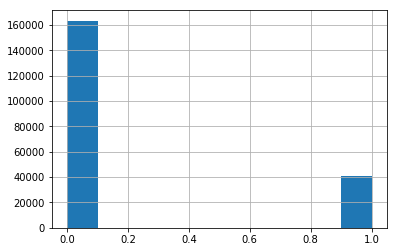

In [176]:
df_sf['popular'].hist()

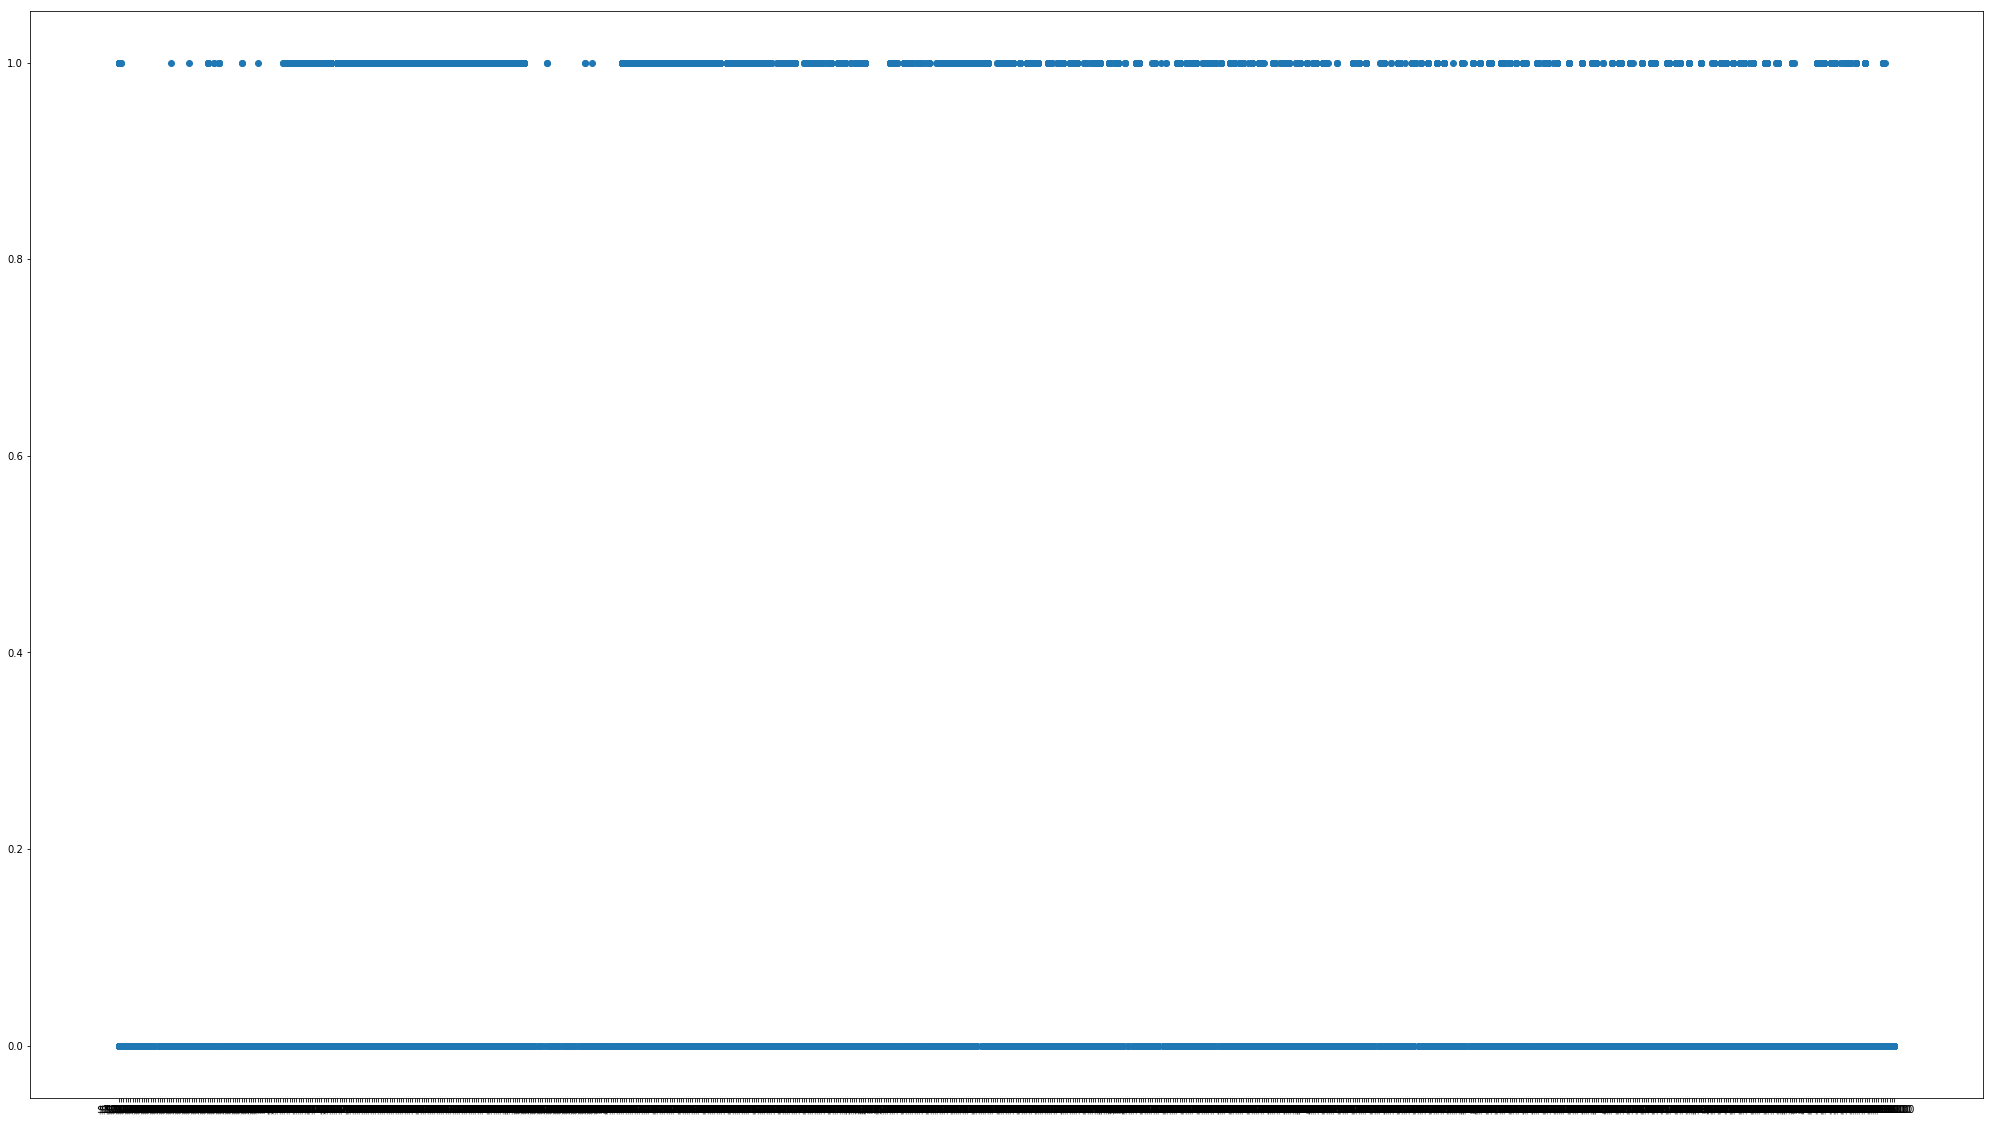

In [179]:
fig, ax = plt.subplots(figsize=(35, 20))
ax.scatter(df_sf.price, df_sf.popular);


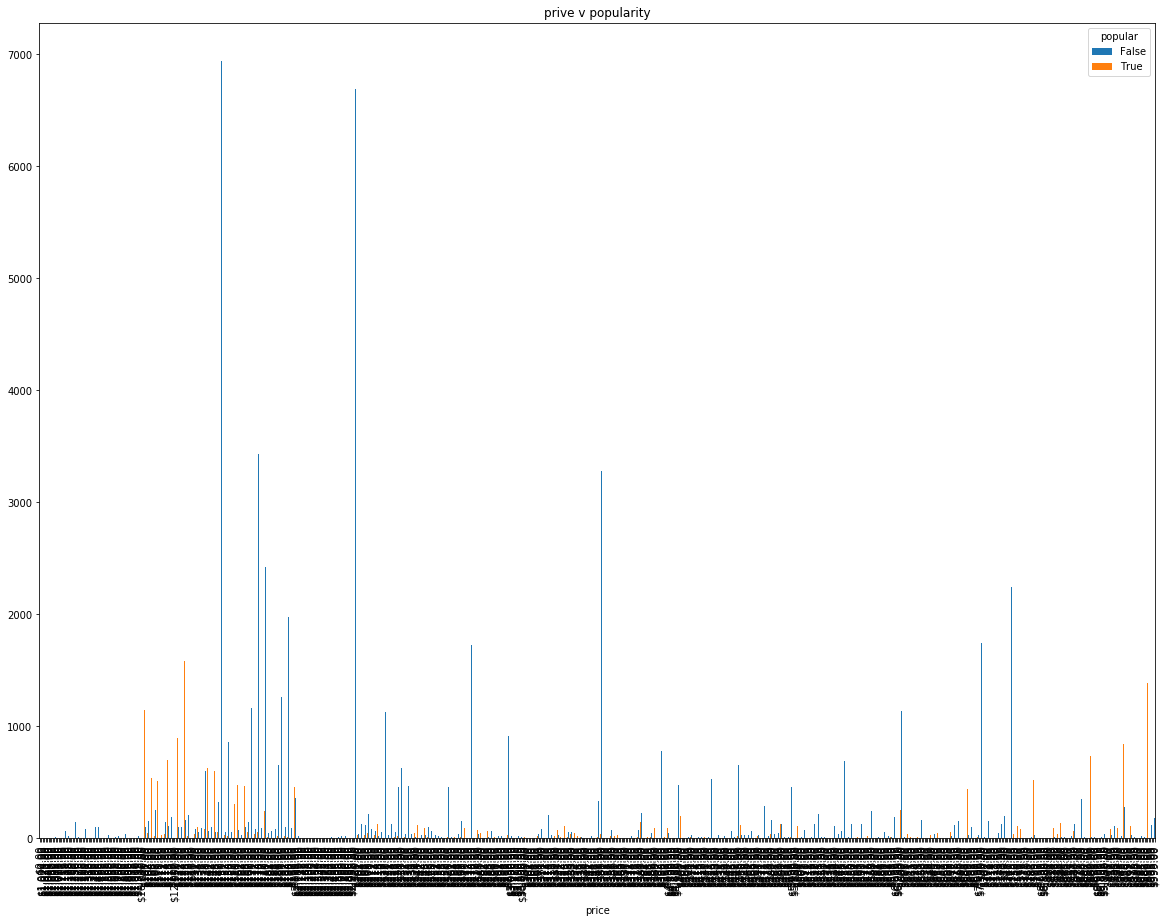

In [181]:
pd.crosstab(df_sf.price, df_sf.popular).plot(kind = 'bar', figsize = (20, 15), title = 'price v popularity');

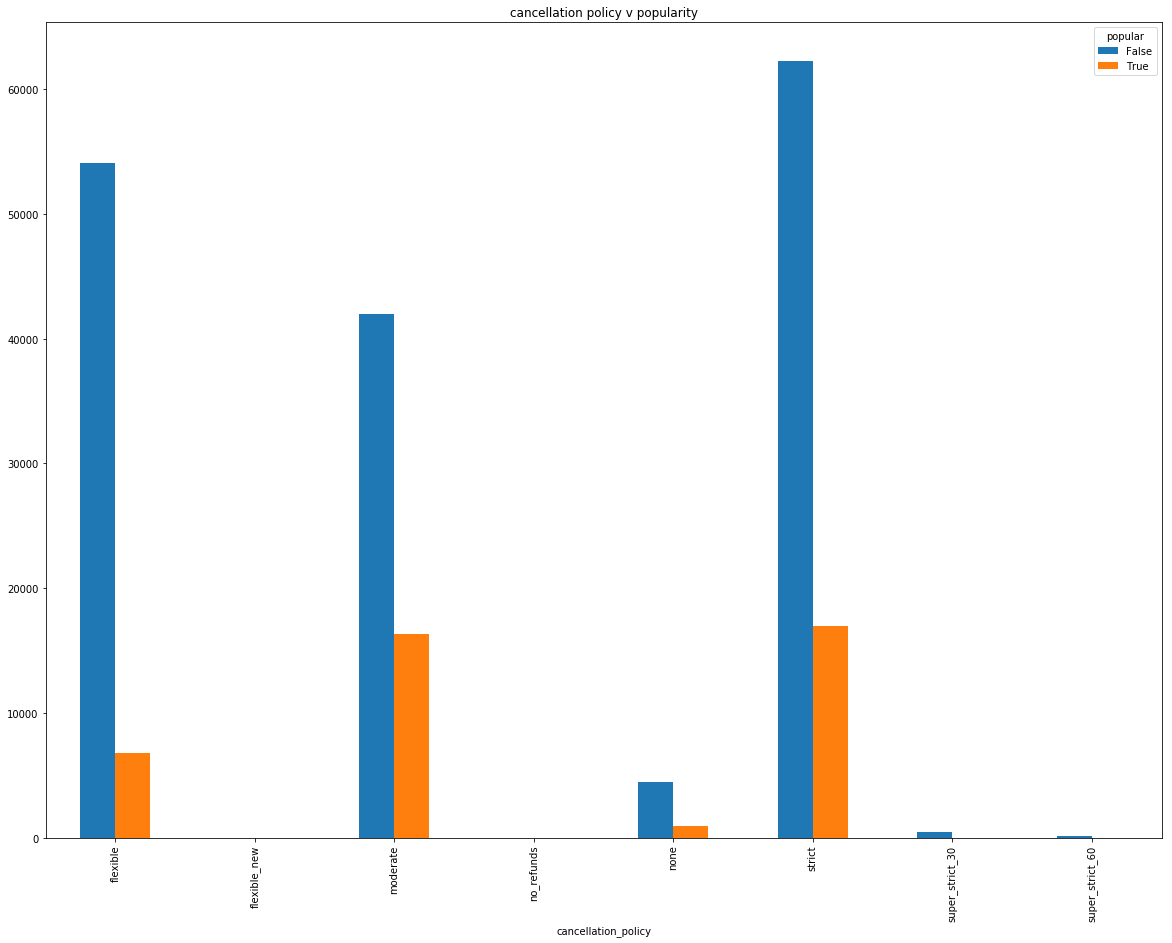

In [204]:
pd.crosstab(df_sf.cancellation_policy, df_sf.popular).plot(kind = 'bar', figsize = (20, 15), title = 'cancellation policy v popularity');

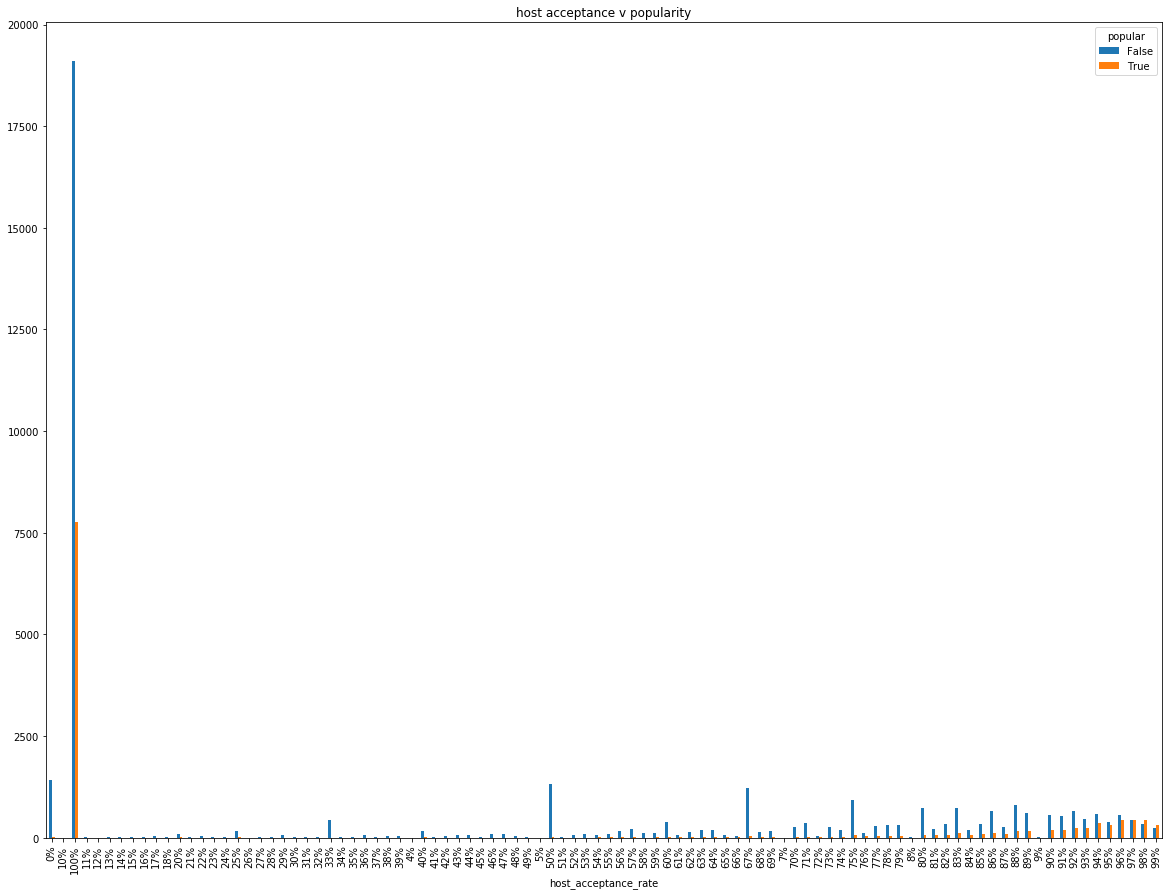

In [196]:
pd.crosstab(df_sf.host_acceptance_rate, df_sf.popular).plot(kind = 'bar', figsize = (20, 15), title = 'host acceptance v popularity');

In [30]:
df_sf[df_sf['host_acceptance_rate'].isnull()]['year'].value_counts()

2017    117421
2016     31425
2015      3296
Name: year, dtype: int64

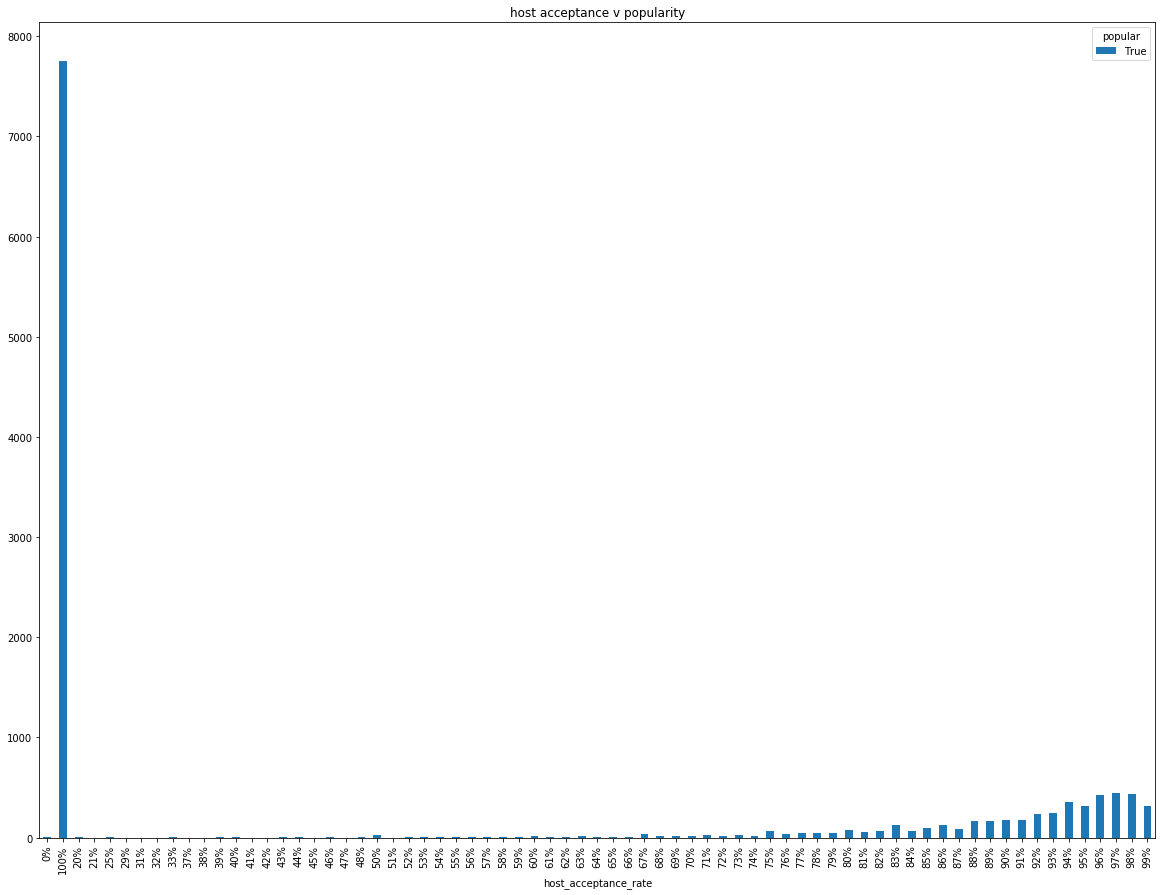

In [205]:
pd.crosstab(df_sf.host_acceptance_rate, df_sf[df_sf.popular==True]['popular']).plot(kind = 'bar', figsize = (20, 15), title = 'host acceptance v popularity');

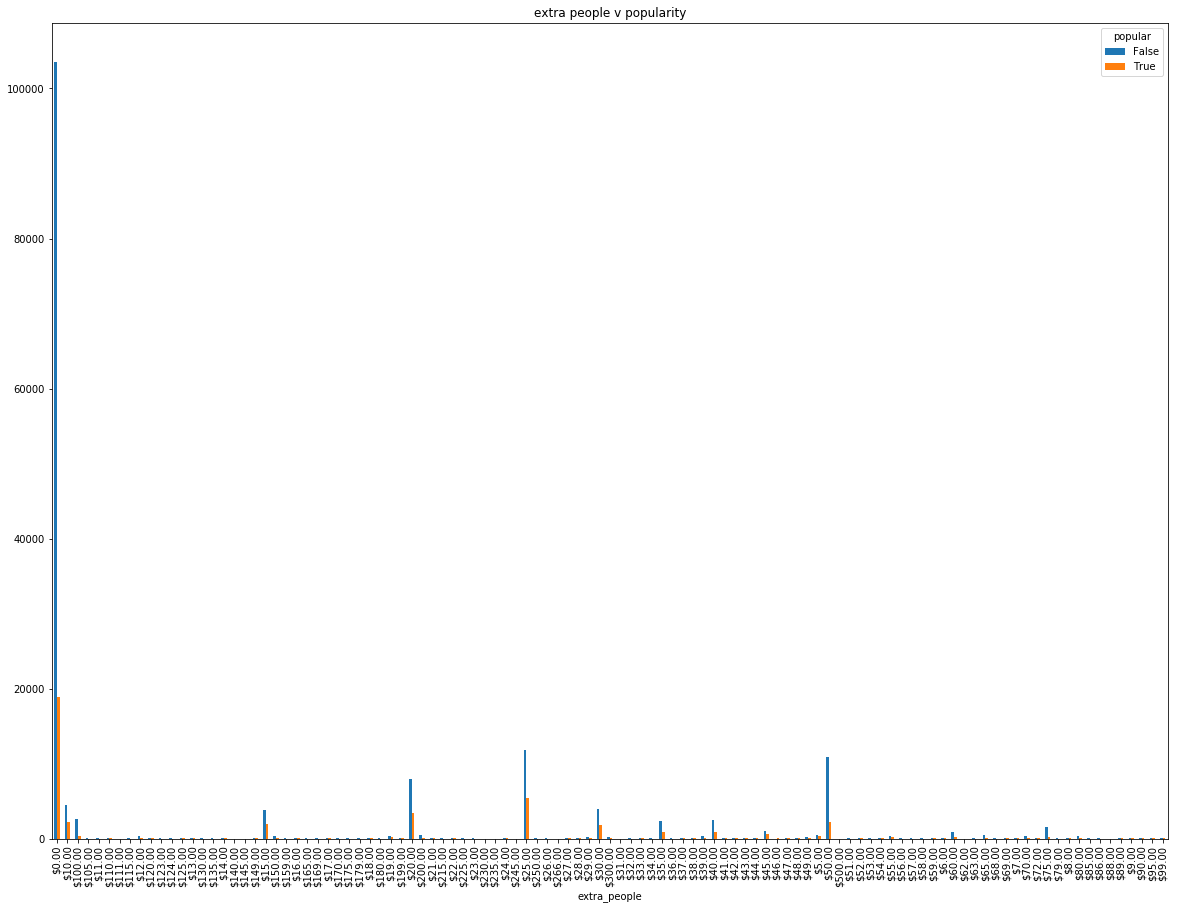

In [198]:
pd.crosstab(df_sf.extra_people, df_sf.popular).plot(kind = 'bar', figsize = (20, 15), title = 'extra people v popularity');

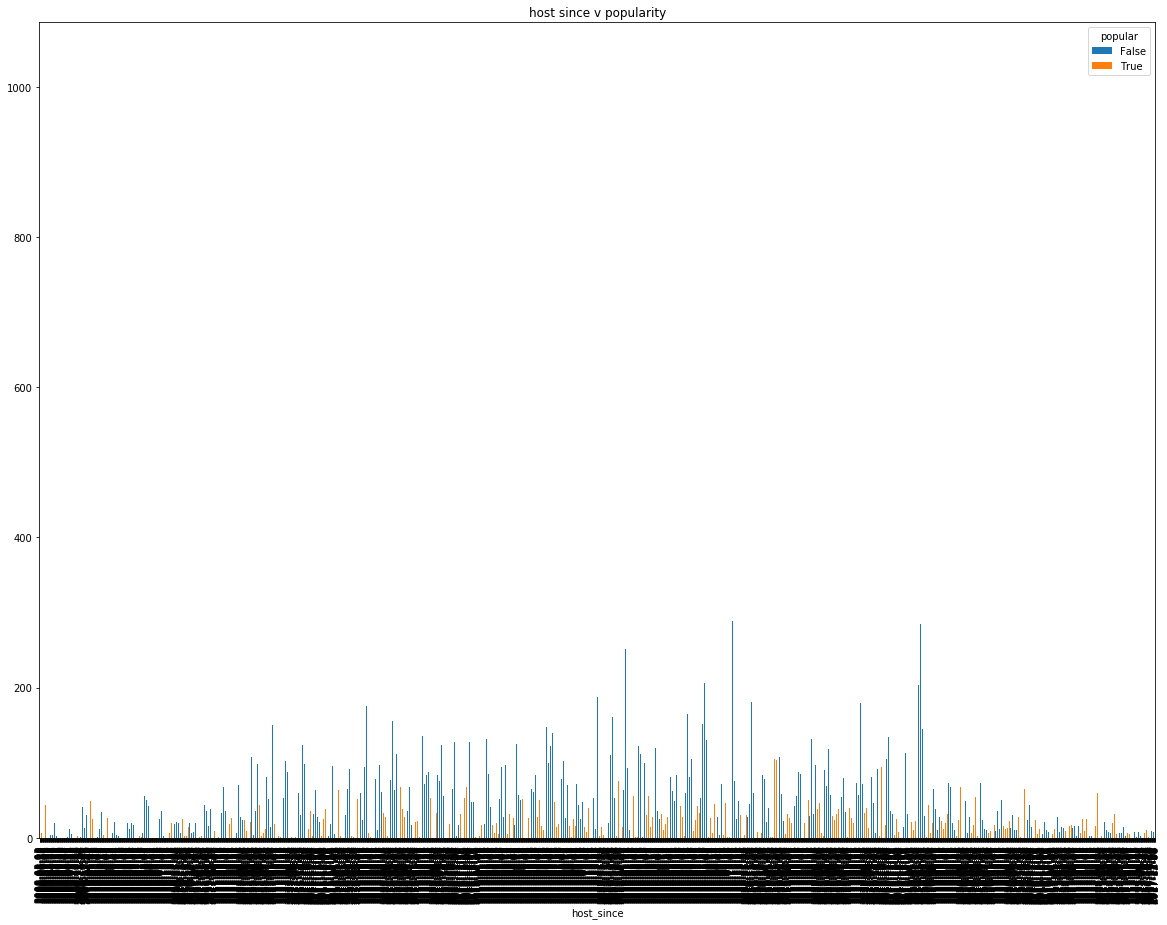

In [200]:
pd.crosstab(df_sf.host_since, df_sf.popular).plot(kind = 'bar', figsize = (20, 15), title = 'host since v popularity');

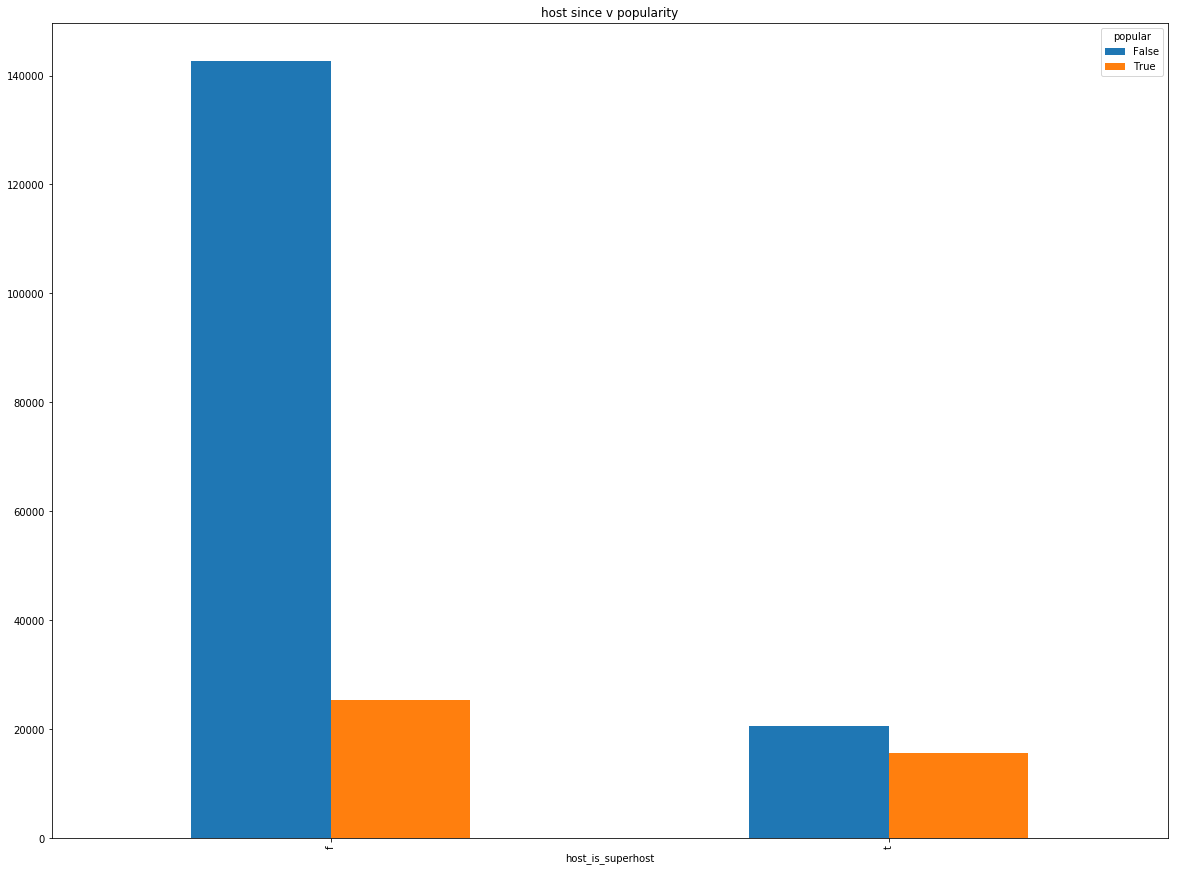

In [209]:
pd.crosstab(df_sf.host_is_superhost, df_sf.popular).plot(kind = 'bar', figsize = (20, 15), title = 'host since v popularity');

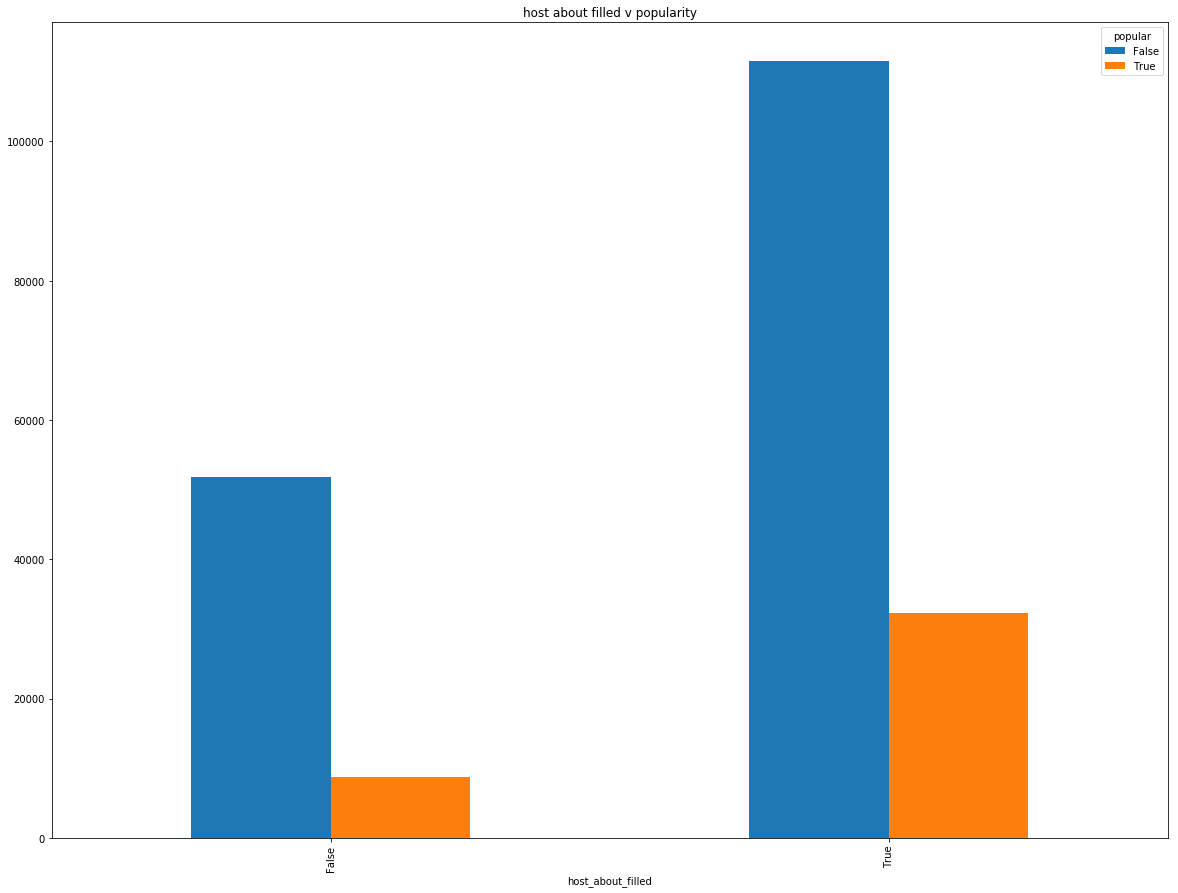

In [226]:
pd.crosstab(df_sf.host_about_filled, df_sf.popular).plot(kind = 'bar', figsize = (20, 15), title = 'host about filled v popularity');

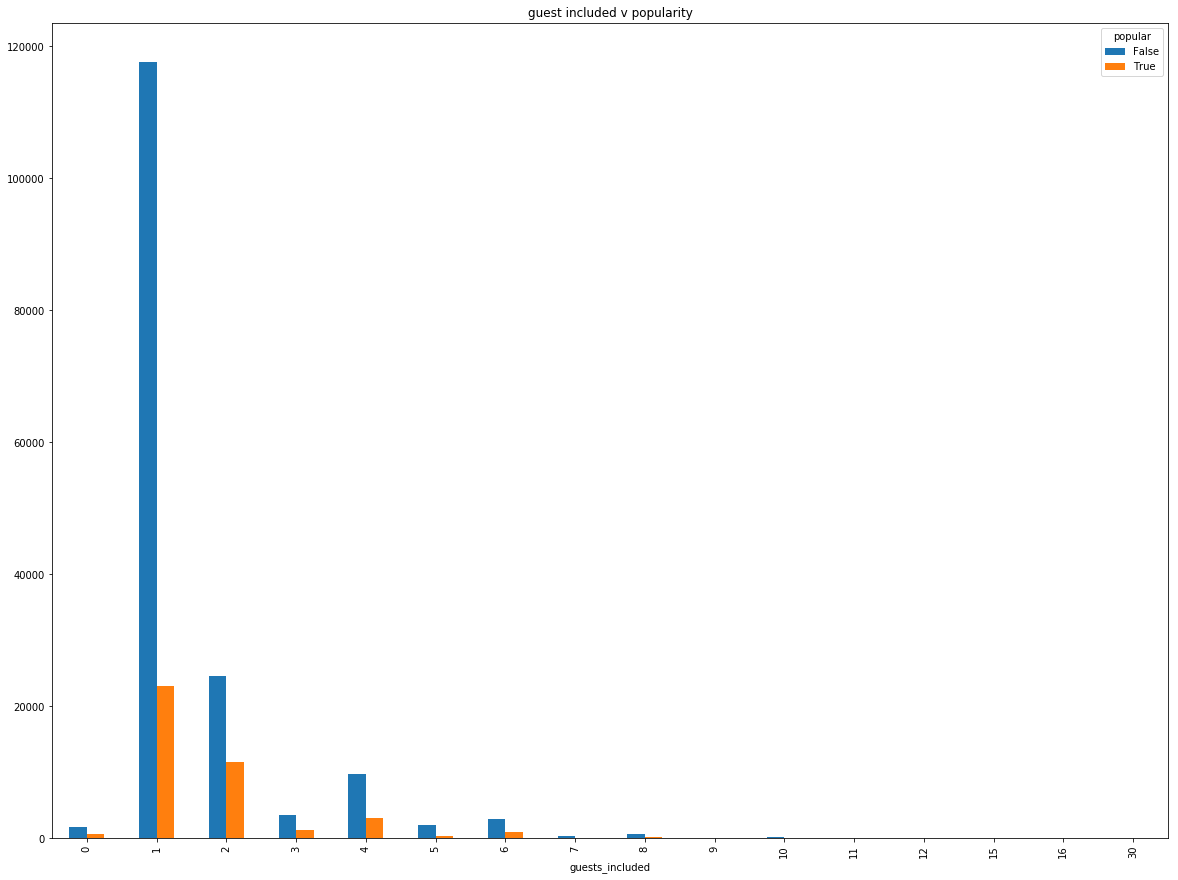

In [228]:
pd.crosstab(df_sf.guests_included, df_sf.popular).plot(kind = 'bar', figsize = (20, 15), title = 'guest included v popularity');

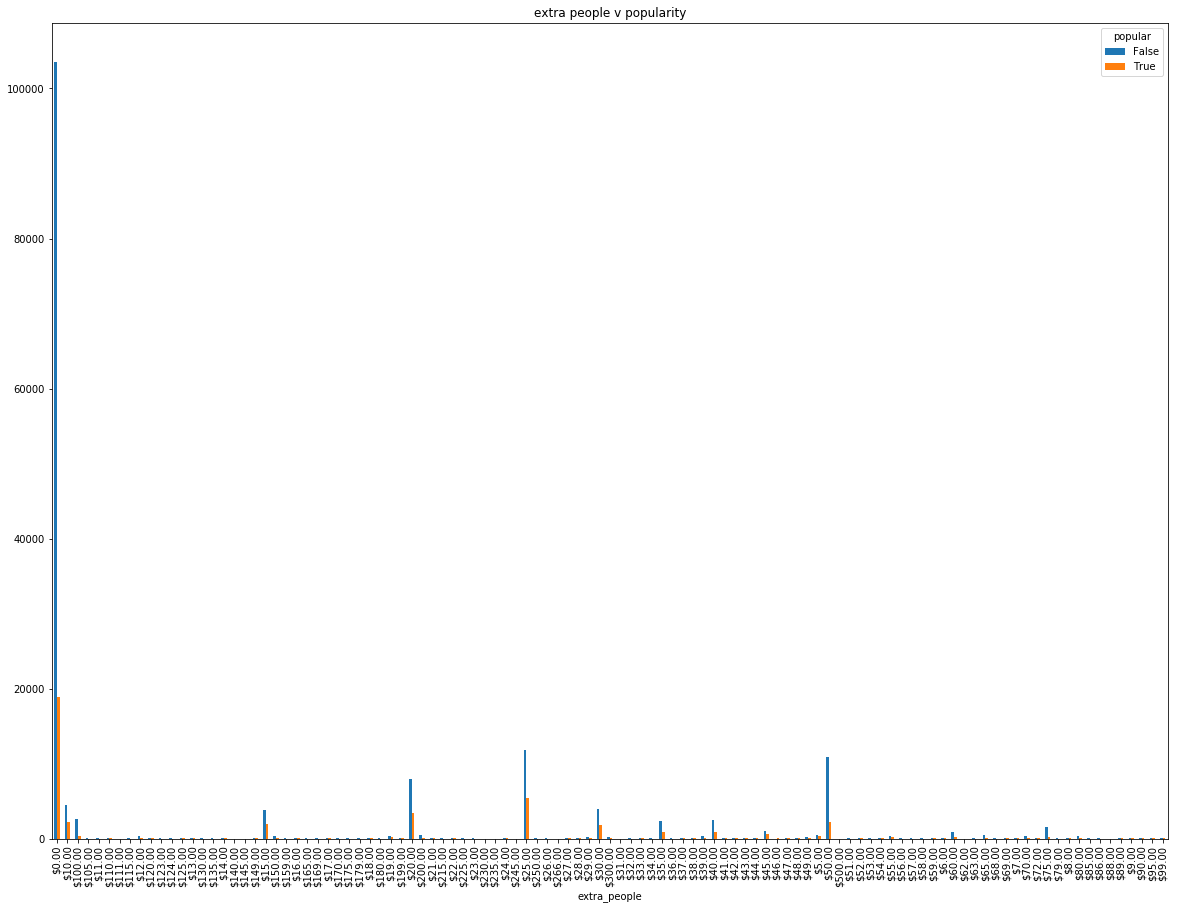

In [229]:
pd.crosstab(df_sf.extra_people, df_sf.popular).plot(kind = 'bar', figsize = (20, 15), title = 'extra people v popularity');

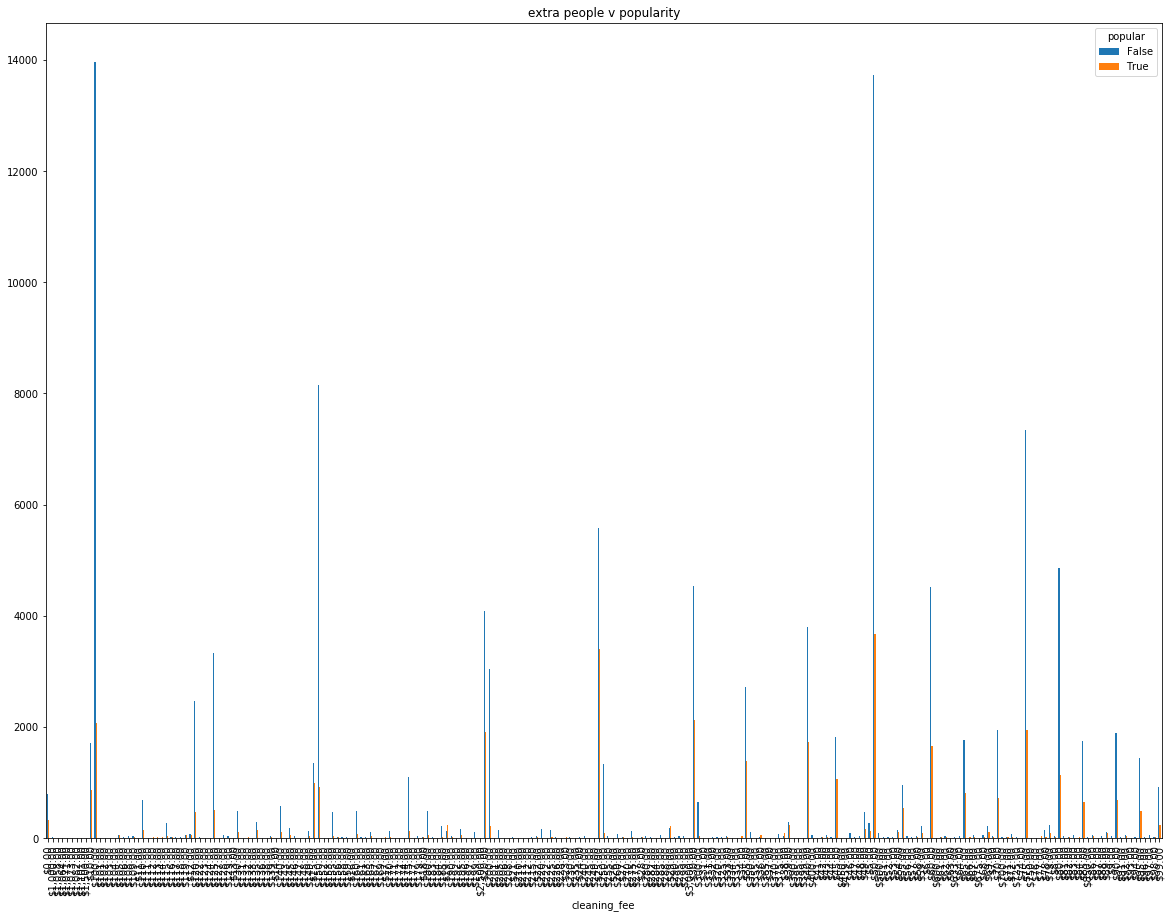

In [233]:
pd.crosstab(df_sf.cleaning_fee, df_sf.popular).plot(kind = 'bar', figsize = (20, 15), title = 'extra people v popularity');

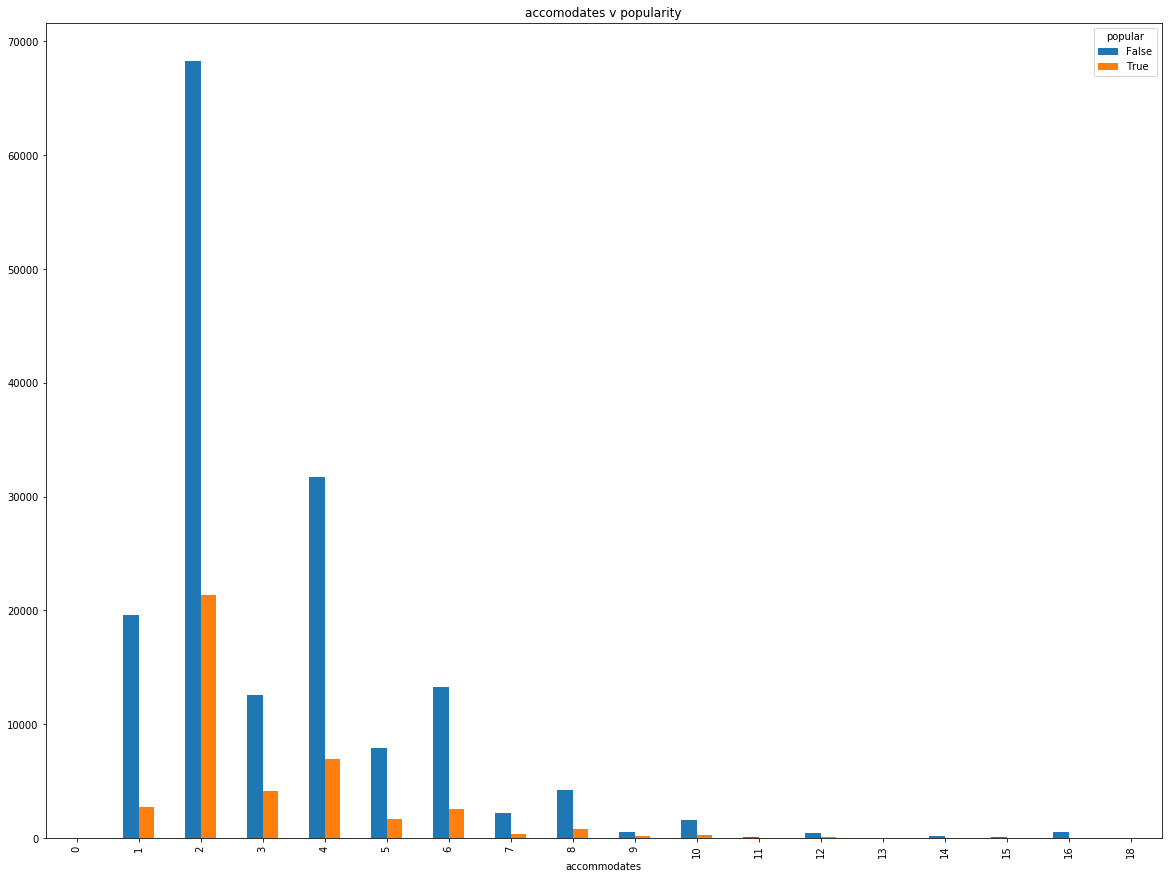

In [254]:
pd.crosstab(df_sf.accommodates, df_sf.popular).plot(kind = 'bar', figsize = (20, 15), title = 'accomodates v popularity');

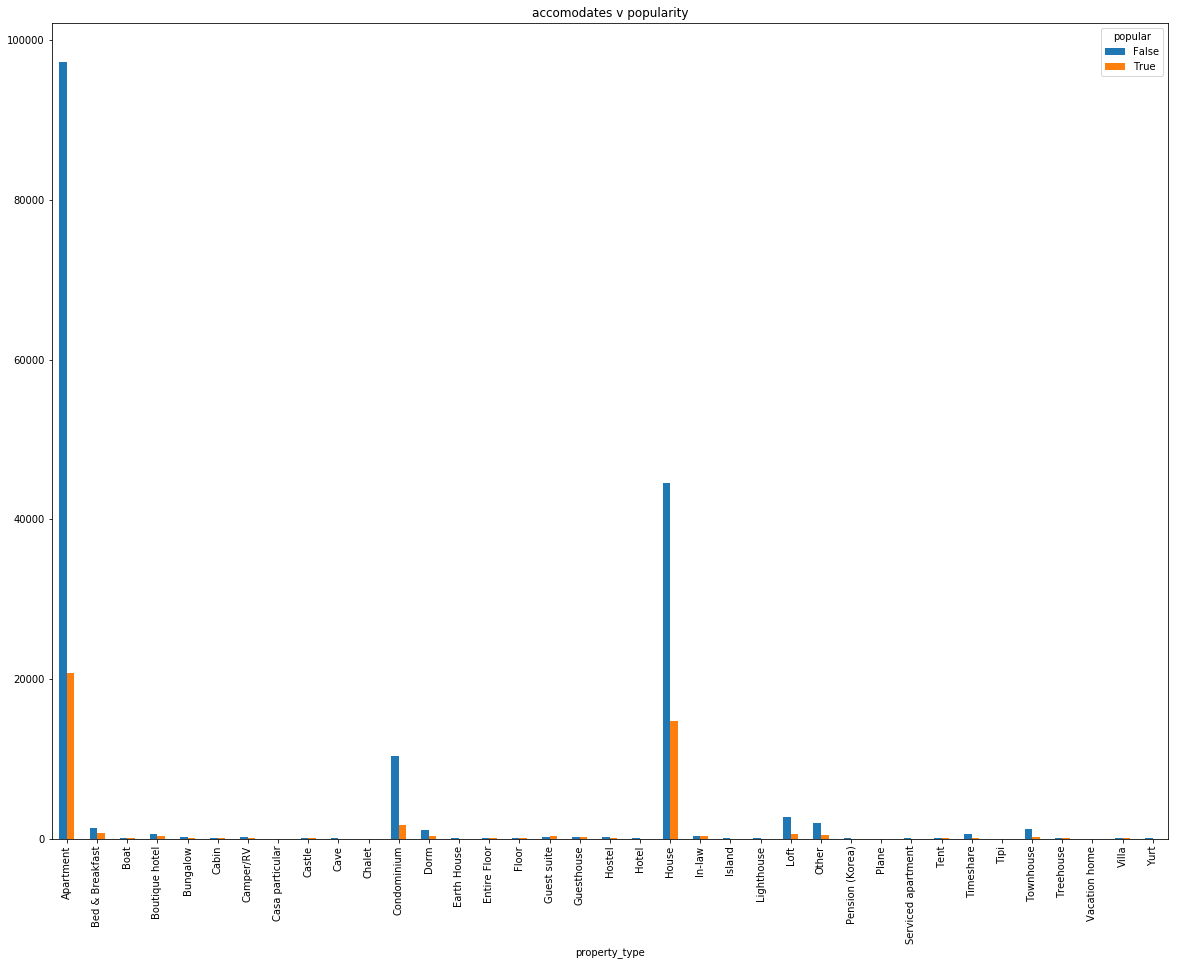

In [22]:
pd.crosstab(df_sf.property_type, df_sf.popular).plot(kind = 'bar', figsize = (20, 15), title = 'accomodates v popularity');

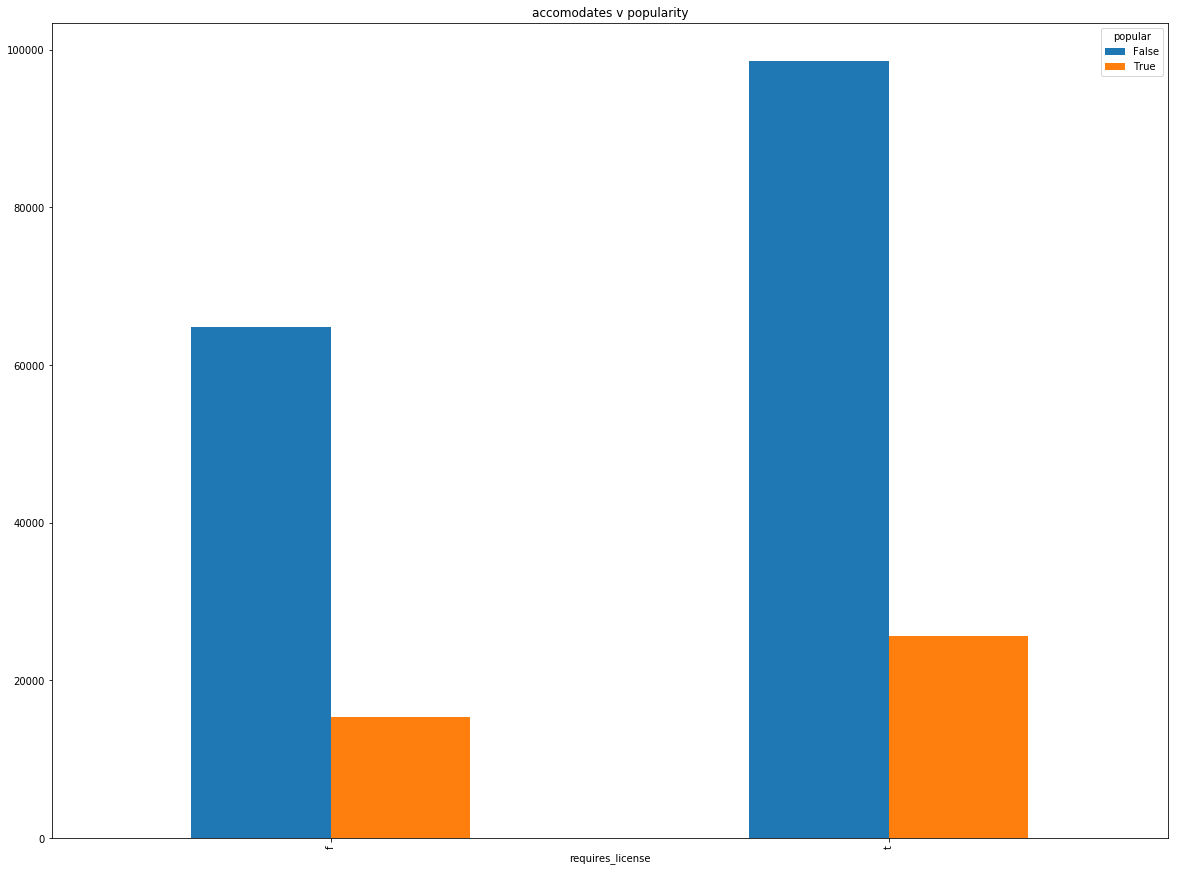

In [23]:
pd.crosstab(df_sf.requires_license, df_sf.popular).plot(kind = 'bar', figsize = (20, 15), title = 'accomodates v popularity');

In [ ]:
# df["year"] = df["calendar_last_scaped"].apply(lambda x: x.year)

In [ ]:
# df_train['avg_rating_of_driver'].fillna(value = 0, inplace=True)

In [ ]:
for column in df_sf.columns:
#     print(df[column].corr())
    if df_sf[column].dtype == 'int':
        print(column)
        print(df_sf[column].corr(df['popular']))

In [ ]:
df2.plot.bar(x= "year occurred", y = top_5_crime, stacked = True)

m = df.groupby(['year occurred','month occurred']).apply(count_rows).unstack()
sns.heatmap(m, linewidth=0.5);

pd.crosstab(df.currency, df.fraud).plot(kind = 'bar', figsize = (20, 15));

df['Latitude'] = df['Latitude'].astype(float) 
df['Longitude'] = df['Longitude'].astype(float) 
df['Longitude'].describe()
df['Latitude'].describe()

for column in df.columns:
#     print(df[column].corr())
    if df[column].dtype == 'int':
        print(column)
        print(df[column].corr(df['fraud']))

In [32]:
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import time

In [33]:
df_sf.description.fillna(value='None', inplace=True)
df_sf_2017.description.fillna(value='None', inplace=True)

In [34]:
def remove_punctuations(doc):
    
    from nltk.tokenize import RegexpTokenizer

    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(doc)

In [36]:
%%time
df_sf_2017['description'] = df_sf_2017['description'].apply(remove_punctuations)

CPU times: user 6.12 s, sys: 372 ms, total: 6.49 s
Wall time: 6.49 s


In [37]:
df_sf_2017['description']

22931                                                                                     [Spacious, sunny, room, in, a, historic, Victorian, 2, blocks, from, the, famous, Haight, and, Ashbury, cross, streets, Two, Queen, sized, beds, Table, with, bar, stools, 3, ceiling, to, floor, windows, Closet, Heater, that, looks, like, a, nightstand, High, Speed, Internet, Spacious, 3, level, 1890, s, Queen, Anne, Victorian, house, close, to, public, transportation, Golden, Gate, Park, and, Historical, Haight, Ashbury, There, are, two, community, bathrooms, 1, on, each, level, 4, independent, studio, style, apartments, 2, on, each, level, with, Victorian, Charm, There, is, a, main, entrance, to, the, house, with, separate, entries, to, your, apartment, room, If, you, re, looking, ...]
22932                                                                                                                                                                                                                 

In [ ]:
data = df_sf_2017['description']
tokenized = [word_tokenize(content.lower()) for content in data]
stop = set(stopwords.words('english'))
docs = [[word for word in words if word not in stop]
        for words in tokenized]

In [ ]:
wordnet = WordNetLemmatizer()
docs_wordnet = [[wordnet.lemmatize(word) for word in words]
                for words in docs]

In [ ]:
def tokenize(doc):
    '''
    INPUT: string
    OUTPUT: list of strings

    Tokenize and stem/lemmatize the document.
    '''
    return [snowball.stem(word) for word in word_tokenize(doc.lower())]


In [ ]:
%%time
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data).toarray()
